Feature Scaling (hay còn gọi là Data Normalization) là một kỹ thuật được sử dụng để chuẩn hoá dữ liệu về cùng phạm vi (same range). 

Ví dụ: trong bài toán dự đoán giá nhà:
- x1 = kích thước (0-2000 feet$^2$)
- x2 = số lượng phòng (0 - 5)

Chúng ta thấy rằng 2 Feature $x1$ và $x2$ có mức chênh lệnh nhau quá lớn về phạm vi: (0-2000) và (0-5). Điều này có thể khiến cho việc hội tụ tới kết quả tối ưu lâu và khó hơn. 

Chính vì vậy mà việc đưa các giữ liệu về cùng một phạm vi là một bước cần thiết trong các bài toán Machine Learning giúp việc hội tụ nhanh hơn.

**Chú ý:** việc chuẩn hóa này chỉ được thực hiện khi vector dữ liệu đã có cùng chiều.

<img src="images/feature-image.png" style="width:50%;height:50%;">

Một vài ý tưởng về việc chuẩn hoá dữ liệu là đưa các Feature về cùng một khoảng $[-1; 1]$ hay $[-0.5; 0.5]$. Một vài kỹ thuật thường dùng:

### 1. Rescaling

Phương pháp này được gọi là **min-max scaling**, là phương pháp đơn giản nhất để đưa các Future về cùng khoảng [-1;1] hay [0;1]. Nếu muốn đưa các Future về đoạn [0;1] thì công thức là:

<center> $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$ </center>

Trong đó:
- $x$: giá trị ban đầu.
- $x'$: giá trị đã được chuẩn hoá.
- $x_{min}$: giá trị nhỏ nhất của $x$ trong bộ dữ liệu training.
- $x_{max}$: giá trị lớn nhất của $x$ trong bộ dữ liệu training.

**Ví dụ:** Đưa dữ liệu được sinh ra theo phân phối cấp số nhân về đoạn [0;1].

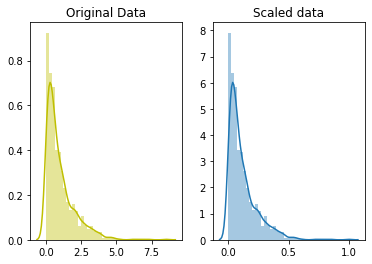

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

# Dữ seed random
np.random.seed(0)

# tạo 1000 điểm dữ liệu ngẫu nhiên từ phân phối cấp số nhân (exponential)
original_data = np.random.exponential(size = 1000)

# dữ dữ liệu về đoạn [0;1]
scaled_data = minmax_scale(original_data)

# vẽ 2 đồ thị giữ liệu ban đầu và sau khi Scaling 
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")
plt.show()

### 2. Normalization và Standardization

Việc Normalization là đưa tất cả các điểm dữ liệu về dạng phân phối chuẩn (normal distribution).

**Nhắc lại về phân phối chuẩn**: phân phối chuẩn còn gọi là phân phối Gauss hay (Hình chuông Gauss), là một phân phối xác suất cực kì quan trọng trong nhiều lĩnh vực. Nó là họ phân phối có dạng tổng quát giống nhau, chỉ khác tham số vị trí (giá trị trung bình $\mu$) và tỉ lệ (phương sai $\sigma^2$). 

<img src="images/image-2.png" style="width:70%;height:70%;">

**Chú ý:** Định nghĩa trên là theo lý thuyết xác suất - thống kê nên có nhiều dạng phân phối khác nhau. Dưới đây là một số dạng phân phối thường dùng trong Machine Learning.

#### 1. Standardization

Standardization (còn được gọi là z-score normalization) biến đổi dữ liệu sao cho phân phối của kết quả có giá trị trung bình ($\mu$) bằng 0 và độ lệch chuẩn ($\sigma$) bằng 1. Khi đó, công thức chuẩn hoá là:

<center> $x' = \frac{x - x_{mean}}{\sigma}$ </center>

Trong đó:
- $x'$: giá trị sau chuẩn hoá.
- $x$: giá trị ban đầu.
- $x_{mean}$: giá trị mean của bộ dữ liệu.
- $\sigma$: phương sai (standard deviation).

Công thức z-score trong thống kê được định nghĩa:

<center> $x' = \frac{x - \mu}{\sigma}$ </center>


#### 2. Normalization

Cách đơn giản thứ 2 để chuẩn hoá dữ liệu là Normalization. Nó chỉ khác phương pháp z-score ở mẫu số:

<center> $x' = \frac{x - x_{mean}}{x_{max} - x_{min}}$ </center>

Trong đó:
- $x'$: giá trị sau chuẩn hoá.
- $x$: giá trị ban đầu.
- $x_{mean}$: giá trị mean của bộ dữ liệu.
- $x_{max}, x_{min}$: giá trị lớn nhất / nhỏ nhất trong bộ dữ liệu.

Trong phương pháp này, giá trị lớn nhất có được là 1 và nhỏ nhất là 0. Nên dữ liệu nằm trong đoạn $[0;1]$.

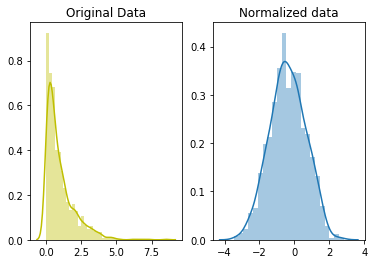

In [2]:
from scipy import stats

# chuẩn hoá dữ liệu bằng boxcox 
normalized_data = stats.boxcox(original_data)

# vẽ 2 đồ thị giữ liệu ban đầu và sau khi chuẩn hoá 
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

#### Một vài chú ý: 
- Khi Scaling: bạn thay đổi phạm vi của dữ liệu.
- Khi chuẩn hoá: bạn thay đổi hình dạng phân phối của dữ liệu. 

### Tài liệu tham khảo 

[1] [Wikipedia - Phân phối chuẩn](https://vi.wikipedia.org/wiki/Ph%C3%A2n_ph%E1%BB%91i_chu%E1%BA%A9n)

[2] [Scaling vs Normalization](https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization)